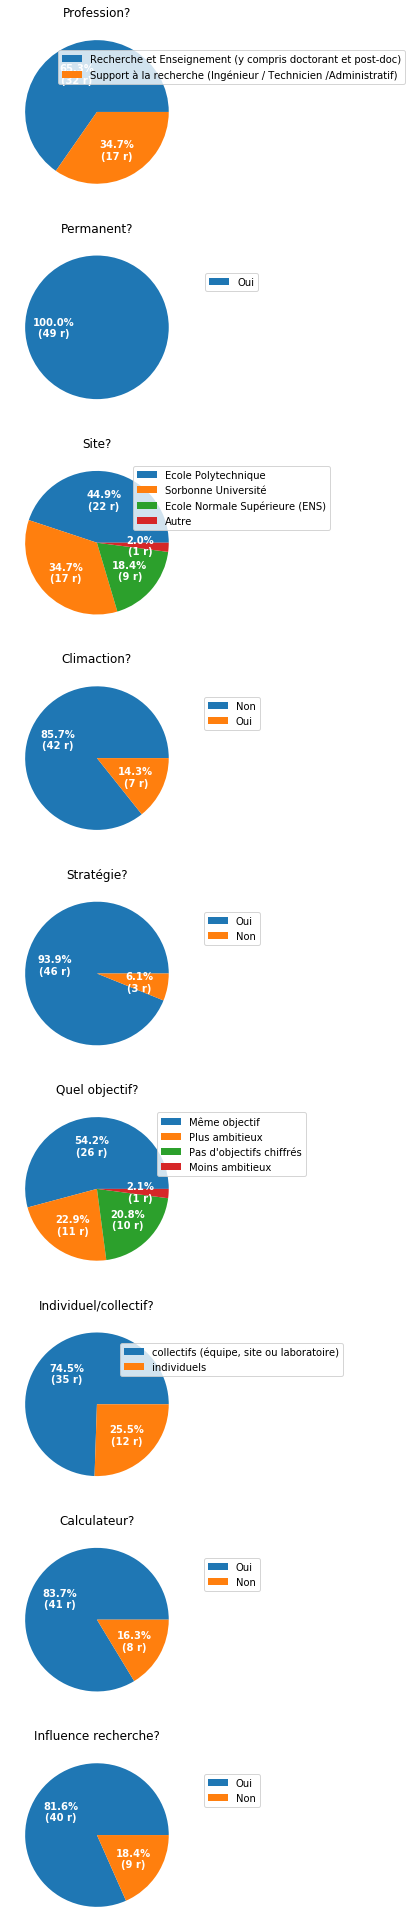

In [449]:
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as plt
import pandas as pd
import numpy as np

def savefig(fig,ax,pathfig,name='',title='',fts=15,xsize=(4,5),zmax=None):
    plt.xticks(size=fts)
    plt.yticks(size=fts)
    plt.title(title)
    tl.mkdir(pathfig)
    fig.set_size_inches(xsize)
    print(pathfig,title)
    fig.savefig(pathfig+name + '.png')#,dpi='figure')
    fig.savefig(pathfig+name + '.pdf', dpi=1000)
    plt.close()
    
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} r)".format(pct, absolute)


df     = pd.read_csv('Reponse_FR.csv')
df_eng = pd.read_csv('Reponse_ENG.csv')
df2    = pd.merge(df, df_eng)


# Make a selection !!
# Subset
said_yes = df[df['Votre poste est-il permanent ?'] == 'Oui']
df       = said_yes

questions=df.columns.values

pies     = [1,2,3,4,5,6,8,17,18]
New_name = ['Profession?', 'Permanent?', 'Site?', 'Climaction?','Stratégie?','Quel objectif?',
            'Individuel/collectif?','Calculateur?','Influence recherche?']

fig, ax = plt.subplots(len(pies),figsize=(30, 35), subplot_kw=dict(aspect="equal"))

for ij,nbpie in enumerate(pies): #range(nbpies):
    data = df[questions[nbpie]].value_counts()#normalize=True)
    wedges, texts, autotexts = ax[ij].pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"))
    
    ax[ij].legend(wedges, data.index,
          loc="center",
          bbox_to_anchor=(1, 1, 0.5, -0.5))
          #title=questions[1],
    plt.setp(autotexts, size=10, weight="bold")
    ax[ij].set_title(New_name[ij]) #questions[ij+1])

plt.show()




In [443]:
print(df[questions[10]].str.contains('Missions').value_counts())
print(df[questions[10]].str.contains('Campagnes').value_counts())
print(df[questions[10]].str.contains('Calcul').value_counts())
print(df[questions[10]].str.contains('Achats').value_counts())
print(df[questions[10]].str.contains('Déplacements').value_counts())

True     61
False    17
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64
False    49
True     29
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64
True     49
False    29
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64
False    67
True     11
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64
False    56
True     22
Name: Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?, dtype: int64


Missions (hors campagnes de terrain)    61
Calcul et stockage numérique            49
Bâtiments/chauffage/climatisation       47
Campagnes de terrain                    29
Déplacements domicile/travail           22
Achats                                  11
dtype: int64


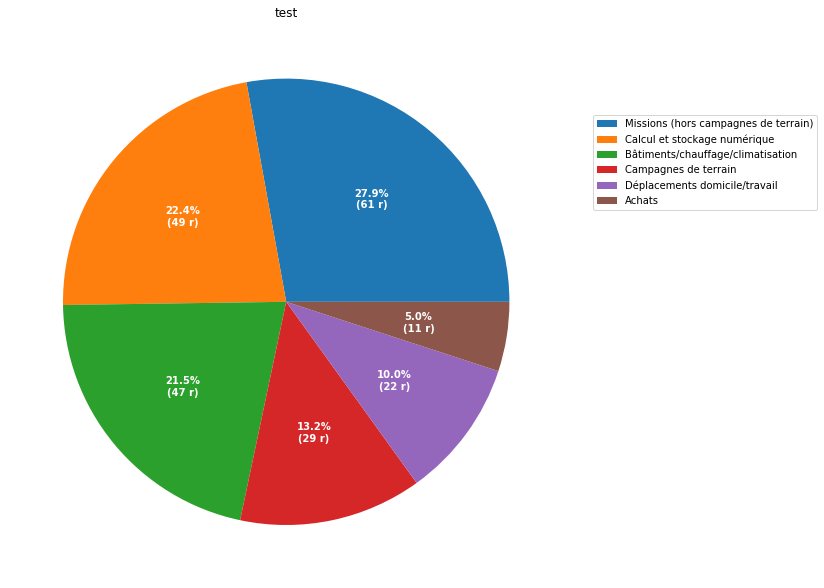

In [444]:
new_df=df[questions[10]].str.split(';', expand=True)
emission=new_df.stack().value_counts()
#new_df.stack().value_counts().plot(kind='bar', figsize=(15,7), color="#61d199")``

#for ij,nbpie in enumerate([10]): #range(nbpies):
data = emission #df[questions[nbpie]].value_counts()#normalize=True)
data = data[data>1]
print(data)
fig, ax = plt.subplots(1,figsize=(10, 15), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"))
ax.legend(wedges, data.index,
      loc="center",
      bbox_to_anchor=(1, 1, 0.5, -0.5))
      #title=questions[1],
plt.setp(autotexts, size=10, weight="bold")
ax.set_title('test') #questions[ij+1])

plt.show()

In [445]:
df.shape

print(questions)

['Horodateur' 'Quel est votre profession ?'
 'Votre poste est-il permanent ?'
 'Sur quel site travaillez-vous majoritairement ?'
 'Etes-vous impliqué(e) dans le groupe LMD-Climactions ?'
 "Le LMD doit-il définir une stratégie de réduction d'émissions ?"
 "Comment devons-nous nous situer par rapport à l'objectif national de réduction d'émissions pour l'horizon 2030 (-50% en 2030 par rapport à notre bilan carbone de 2019) ?"
 'Par quels moyens/modalités ? (choix multiples) '
 "Si le LMD se fixe des plafonds d'émissions ou de coût carbone, doivent-ils être :"
 "Avez-vous une remarque sur les moyens d'actions d'une stratégie de réduction des émissions?"
 'Selon vous, quel(s) poste(s) sont les plus émetteurs au LMD ?'
 "Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Missions (hors campagnes de terrain)]"
 "Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Campagnes de terrain]"
 "Selon vous, est-ce qu'une éventuelle stra

Missions (hors campagnes de terrain) Ne pas toucher          1
Plutôt d'accord        27
Plutôt pas d'accord     5
Priorité               40
Name: Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Missions (hors campagnes de terrain)], dtype: int64 Index(['Ne pas toucher', 'Plutôt d'accord', 'Plutôt pas d'accord', 'Priorité'], dtype='object') (4,)
Campagnes de terrain Ne pas toucher         19
Plutôt d'accord        24
Plutôt pas d'accord    25
Priorité                3
Name: Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Campagnes de terrain], dtype: int64 Index(['Ne pas toucher', 'Plutôt d'accord', 'Plutôt pas d'accord', 'Priorité'], dtype='object') (4,)
Calcul et stockage numérique Ne pas toucher          5
Plutôt d'accord        48
Plutôt pas d'accord    12
Priorité                9
Name: Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Calcul et stockage numérique], dtype: int

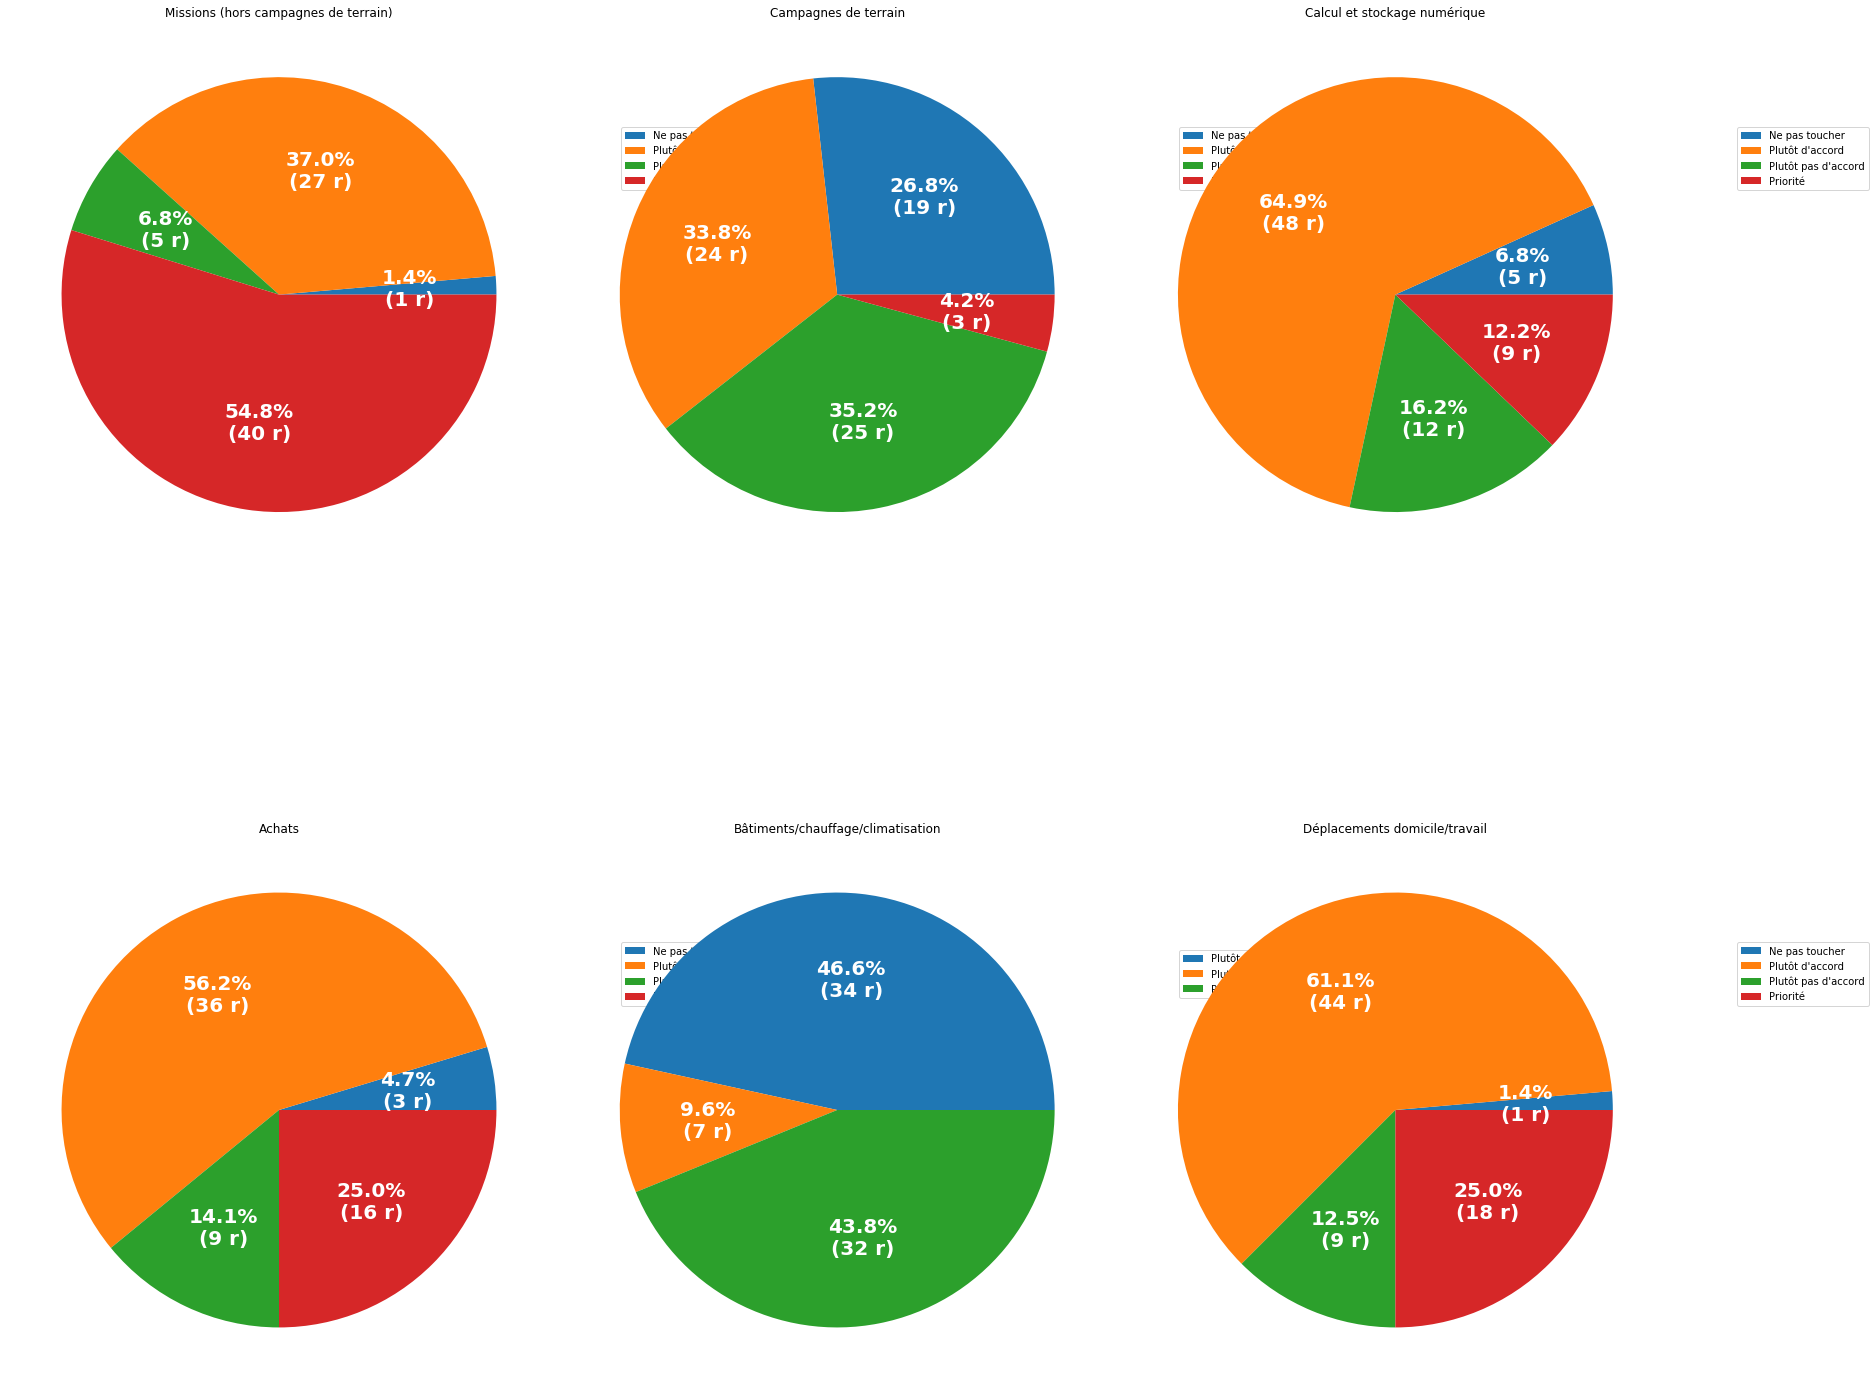

In [448]:
pies     = [11,12,13,14,15,16]

#fig, ax = plt.subplots(len(pies),figsize=(30, 35), subplot_kw=dict(aspect="equal"))
fig, ax = plt.subplots(2, 3, figsize=(30, 25))
fig.subplots_adjust(hspace = .5, wspace=.001)
ax = ax.ravel()

for ij,nbpie in enumerate(pies):
    #aa = ij // 2
    #bb = (ij+1) //2
    #print(aa,bb)
    
    data = df[questions[nbpie]].value_counts().sort_index()#normalize=True)
    name = data.name.split('[')[1][:-1]
    print(name,data,data.index,data.shape)
    wedges, texts, autotexts = ax[ij].pie(data, autopct=lambda pct: func(pct, data)
                                          ,textprops=dict(color="w")) #,explode=(0, 0, 0.1, 0))
    #if ij==2:
    ax[ij].legend(wedges, data.index,
            loc="center",
            bbox_to_anchor=(1, 1, 0.5, -0.5))
    plt.setp(autotexts, size=20, weight="bold")
    ax[ij].set_title(name)

plt.show()

In [319]:
for ij in np.arange(0,5,1):
  print(ij,ij // 2, (ij+1) //2)

0 0 0
1 0 1
2 1 1
3 1 2
4 2 2


In [61]:
df.head()

,Horodateur,Quel est votre profession ?,Votre poste est-il permanent ?,Sur quel site travaillez-vous majoritairement ?,Etes-vous impliqué(e) dans le groupe LMD-Climactions ?,Le LMD doit-il définir une stratégie de réduction d'émissions ?,Comment devons-nous nous situer par rapport à l'objectif national de réduction d'émissions pour l'horizon 2030 (-50% en 2030 par rapport à notre bilan carbone de 2019) ?,Par quels moyens/modalités ? (choix multiples),"Si le LMD se fixe des plafonds d'émissions ou de coût carbone, doivent-ils être :",Avez-vous une remarque sur les moyens d'actions d'une stratégie de réduction des émissions?,...,"Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Missions (hors campagnes de terrain)]","Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Campagnes de terrain]","Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Calcul et stockage numérique]","Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Achats]","Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Bâtiments/chauffage/climatisation]","Selon vous, est-ce qu'une éventuelle stratégie de réduction doit s'appliquer sur : [Déplacements domicile/travail]",Seriez-vous intéressé par un calculateur qui vous permettrait d'estimer et de suivre sur l'année votre empreinte individuelle professionnelle dans ces différents domaines d’émissions ?,Pensez-vous que votre activité professionnelle puisse être d'aussi bonne qualité à moindre impact carbone ? (espace commentaire ci-dessous),Avez-vous des remarques sur ce point spécifiquement ?,Avez-vous des commentaires/questions/suggestions de manière générale sur une stratégie de réduction d'émissions au LMD ?
0,2021/03/25 3:46:39 PM UTC+2,Recherche et Enseignement (y compris doctorant...,Non,Ecole Polytechnique,Oui,Oui,Même objectif,Sensibilisation / bonnes pratiques / volontari...,"collectifs (équipe, site ou laboratoire)",NaN,...,Ne pas toucher,Ne pas toucher,Ne pas toucher,Plutôt pas d'accord,Plutôt d'accord,Plutôt d'accord,Oui,Oui,NaN,NaN
1,2021/03/25 3:48:09 PM UTC+2,Support à la recherche (Ingénieur / Technicien...,Oui,Ecole Polytechnique,Non,Oui,Même objectif,En se fixant des plafonds d'émissions ou de co...,"collectifs (équipe, site ou laboratoire)",NaN,...,Plutôt d'accord,Ne pas toucher,Plutôt d'accord,Plutôt d'accord,Priorité,Plutôt pas d'accord,Oui,Oui,NaN,NaN
2,2021/03/25 3:48:42 PM UTC+2,Support à la recherche (Ingénieur / Technicien...,Non,Ecole Polytechnique,Non,Oui,Plus ambitieux,Sensibilisation / bonnes pratiques / volontari...,"collectifs (équipe, site ou laboratoire)",Organisation en distanciel pour toutes les con...,...,Priorité,Plutôt d'accord,Plutôt d'accord,Plutôt d'accord,Priorité,Priorité,Oui,Oui,NaN,NaN
3,2021/03/25 3:49:18 PM UTC+2,Recherche et Enseignement (y compris doctorant...,Oui,Ecole Polytechnique,Non,Oui,Même objectif,Sensibilisation / bonnes pratiques / volontariat,NaN,NaN,...,Plutôt d'accord,Plutôt pas d'accord,Plutôt d'accord,Plutôt d'accord,Priorité,Plutôt d'accord,Oui,Oui,NaN,NaN
4,2021/03/25 3:49:24 PM UTC+2,Recherche et Enseignement (y compris doctorant...,Non,Ecole Normale Supérieure (ENS),Non,Oui,Plus ambitieux,Sensibilisation / bonnes pratiques / volontari...,"collectifs (équipe, site ou laboratoire)",NaN,...,Priorité,Plutôt d'accord,Plutôt d'accord,Priorité,Priorité,Plutôt d'accord,Oui,Oui,NaN,NaN


In [62]:
df['Quel est votre profession ?'].value_counts(normalize=True)

Recherche et Enseignement (y compris doctorant et post-doc)       0.670886
Support à la recherche (Ingénieur / Technicien /Administratif)    0.329114
Name: Quel est votre profession ?, dtype: float64

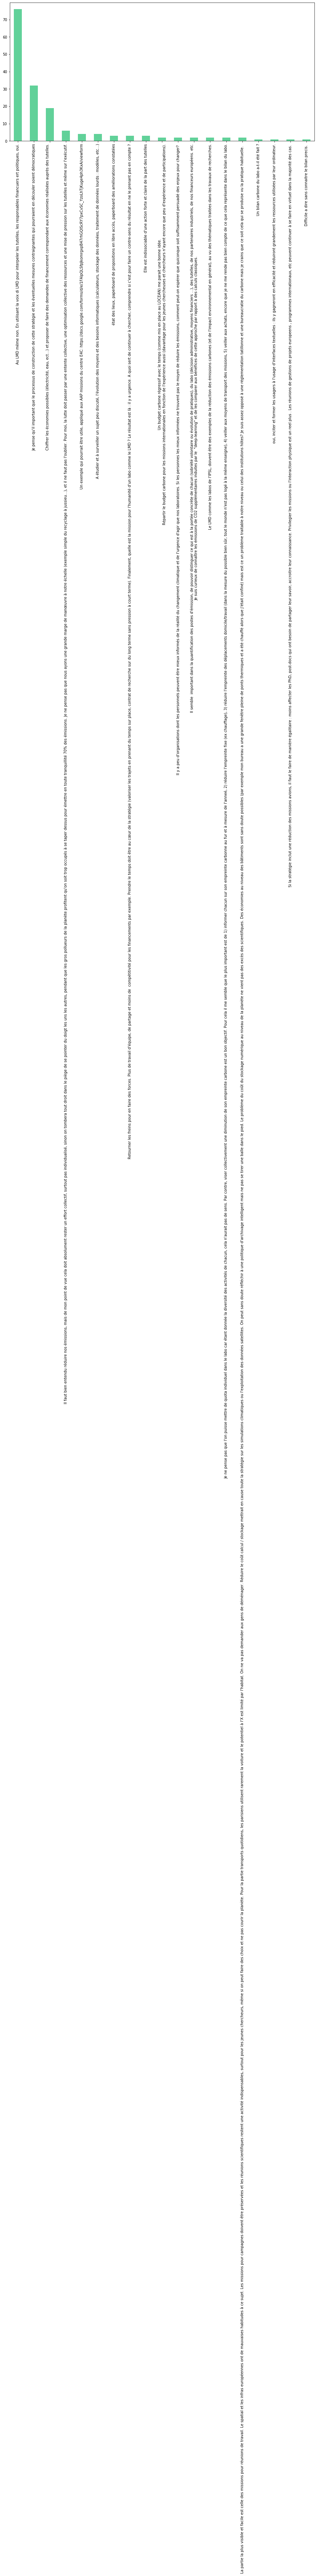

In [96]:
#%matplotlib inline
for ij in questions:
  df[ij].value_counts().plot(kind="bar", figsize=(15,7), color="#61d199")

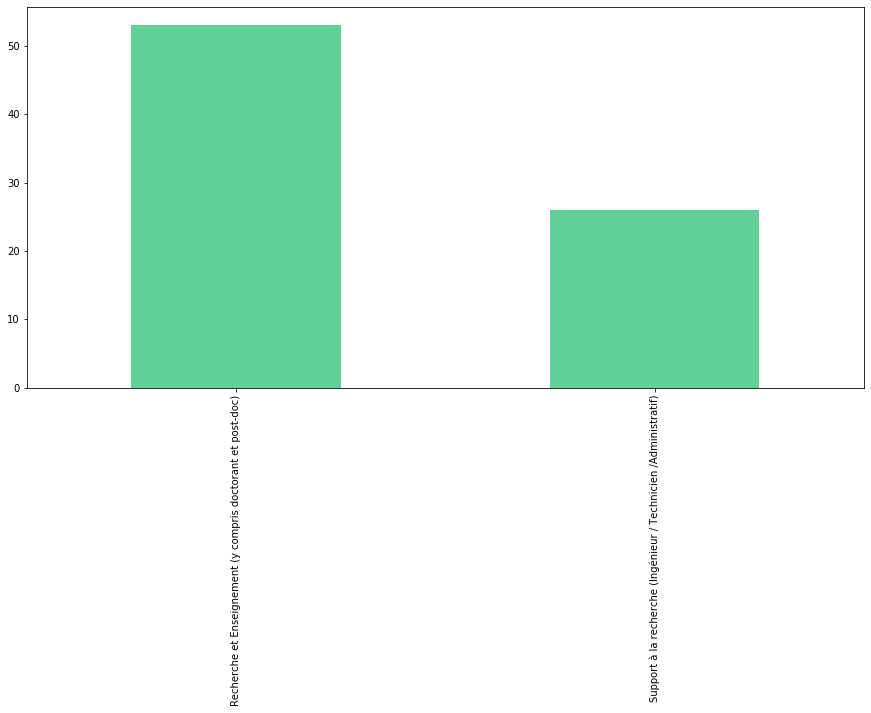

In [98]:
%matplotlib inline
df[questions[1]].value_counts().plot(kind="bar", figsize=(15,7), color="#61d199")

In [31]:
said_yes = df[df['Votre poste est-il permanent ?'] == 'Oui']
said_no = df[df['Votre poste est-il permanent ?'] == 'Non']
said_no.shape

(30, 21)

Oui    0.816327
Non    0.183673
Name: Pensez-vous que votre activité professionnelle puisse être d'aussi bonne qualité à moindre impact carbone ? (espace commentaire ci-dessous), dtype: float64


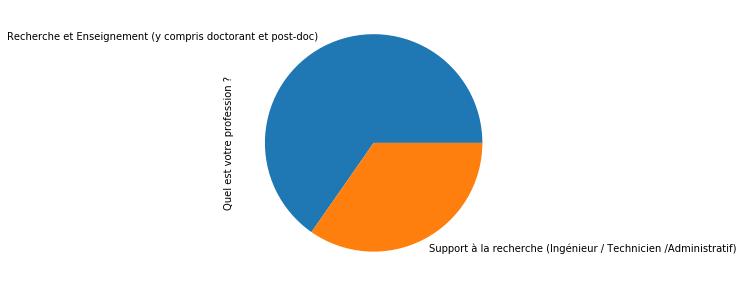

In [133]:
%matplotlib inline
print(said_yes[questions[-3]].value_counts(normalize=True))
#said_yes[questions[1]].value_counts(normalize=True).plot(kind="bar", figsize=(15,7), color="#61d199")
plot = said_yes[questions[1]].value_counts(normalize=True).plot.pie(subplots=True, figsize=(5, 5))

In [429]:
df     = pd.read_csv('Reponse_FR.csv')
df_eng = pd.read_csv('Reponse_ENG.csv')
df_eng = df_eng.set_axis(df.columns.values.tolist(),axis=1)
#print(df_eng.columns.values)
df_eng = df_eng.replace({'Yes':'Oui','No':'Non',''})
print(df[questions[7]].value_counts().index)
print(df_eng[questions[6]].value_counts().index)


#df2    = pd.merge_asof(df, df_eng)
#print(type(['COL','CRO']))
#print(type(df.columns.values.tolist()))
#print(df_eng.columns.values[0])
#print(df_eng.set_axis(df.columns.values.tolist(),axis=1))
#df_eng.columns.values=df.columns.values
#for ij,column in enumerate(df.columns.values):
#    print(df_eng.columns.values[ij])
#    print(column)
#    df_eng.rename(columns={df_eng.columns.values[ij]: column})
#print(df_eng.columns.values)
#df_new = df_eng.rename(columns={'A': 'Col_1'})
#df3

Index(['Sensibilisation / bonnes pratiques / volontariat;En se fixant des plafonds d'émissions ou de coût carbone',
       'Sensibilisation / bonnes pratiques / volontariat',
       'En se fixant des plafonds d'émissions ou de coût carbone',
       'Sensibilisation / bonnes pratiques / volontariat;Limiter les émissions inutiles, ne PAS se fixer QUE sur les émissions carbones, il faut limiter l'usage de plastique, déchet en tout genre.',
       'Plafonds modulés (toutes les activités n'ont pas le même potentiel, la même marge,  ni les mêmes moyens de réduction)',
       'Sensibilisation / bonnes pratiques / volontariat;En se fixant des plafonds d'émissions ou de coût carbone;En changeant les pratiques',
       'Sensibilisation / bonnes pratiques / volontariat;Informer chacun régulièrement sur son bilan carbone pour que cela puisse influer sur son comportement, mais sans forcément imposer un plafond d'émission strict (car toutes les activités ne sont pas égales en terme de bilan carbone)

,Horodateur,Quel est votre profession ?,Votre poste est-il permanent ?,Sur quel site travaillez-vous majoritairement ?,Etes-vous impliqué(e) dans le groupe LMD-Climactions ?,Le LMD doit-il définir une stratégie de réduction d'émissions ?,Comment devons-nous nous situer par rapport à l'objectif national de réduction d'émissions pour l'horizon 2030 (-50% en 2030 par rapport à notre bilan carbone de 2019) ?,Par quels moyens/modalités ? (choix multiples),"Si le LMD se fixe des plafonds d'émissions ou de coût carbone, doivent-ils être :",Avez-vous une remarque sur les moyens d'actions d'une stratégie de réduction des émissions?,...,"In your opinion, should a potential reduction strategy apply on : [Missions (except field campaigns)?]","In your opinion, should a potential reduction strategy apply on : [Field campaigns ?]","In your opinion, should a potential reduction strategy apply on : [Calculation and numerical storage]","In your opinion, should a potential reduction strategy apply on : [Purchase]","In your opinion, should a potential reduction strategy apply on : [Building / heating / air conditioning]","In your opinion, should a potential reduction strategy apply on : [Commuting to and from work]","Would you be interested in a calculator that could allow you to estimate and follow your personal carbon footprint at work on a year basis, in these various emission categories ?",Do you think that the quality of your work could be as good as it is with a lower carbon footprint ? (Comment area below),Do you have any comments on this specific point ?,Do you have any general or specific comments/questions/suggestions about an emission reduction strategy at LMD ?
